Article : https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
plt.style.use("ggplot")

In [3]:
iris=datasets.load_iris()
X=iris.data
y=iris.target

In [4]:
#Z-score
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

In [5]:
#PCA
pca=PCA(n_components=2)
X_new = pca.fit_transform(X)

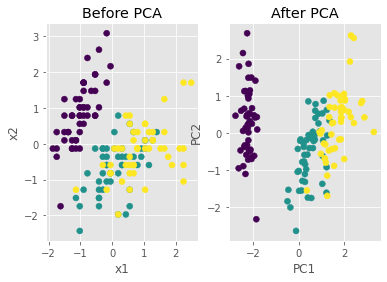

In [8]:
fig,axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel("x1")
axes[0].set_ylabel("x2")
axes[0].set_title("Before PCA")

axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")
axes[1].set_title("After PCA")

plt.show()

In [9]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


In [10]:
np.cov(X_new.T)

array([[2.93808505e+00, 4.83198016e-16],
       [4.83198016e-16, 9.20164904e-01]])

In [11]:
pca.explained_variance_

array([2.93808505, 0.9201649 ])

In [12]:
print(abs(pca.components_))

[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


In [18]:
def biplot(score, coeff , y):
    xs = score[:,0] 
    ys = score[:,1]
    n = coeff.shape[0] 
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) 
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

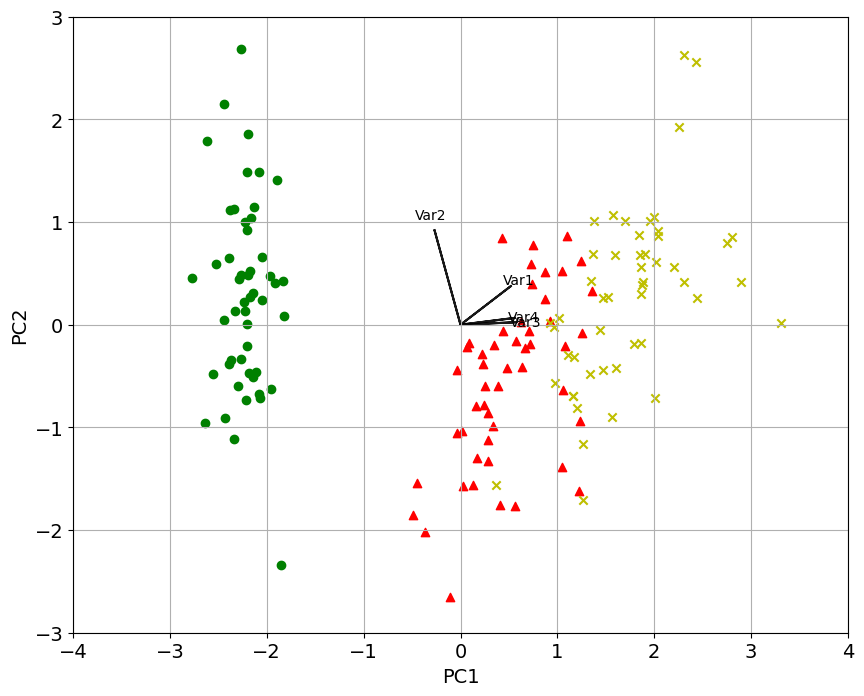

In [20]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

In [22]:
np.corrcoef(X[:,2], X[:,3])[1,0]
np.corrcoef(X[:,1], X[:,2])[1,0]

-0.42844010433054014